In [3]:
from src.Autoencoder import Autoencoder
from src.Dataloader import Dataloader 
import torch
from torchvision.transforms import ToTensor
from models.DeeperWiderAutoencoder import DeeperWiderAutoencoder
#model = Autoencoder(4)
# model = WiderAutoencoder(4)
model = DeeperWiderAutoencoder(4)



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# dataloader = Dataloader("Datasets/Dataset003/Train",24, 224, 224, True)
dataloader = Dataloader("Datasets/Dataset004")

n_images = 4
BS = 16
train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images = n_images, BS=BS)

print('Train dataset size:', len(train_loader.dataset))
print(train_loader.dataset[0].shape)

images = dataloader.get_images(dataloader.path + "\Train", n_images=4)

images = torch.tensor(images, dtype=torch.float32)
image = images[0]
output = model(image.cuda())
# output = model.forward_print(image.cuda())

print("Input shape:", image.shape)
print("Output shape:", output.shape)
# print("Encoded shape:", model.encoded.shape)


Train dataset size: 160
torch.Size([4, 224, 224])
Input shape: torch.Size([4, 224, 224])
Output shape: torch.Size([4, 224, 224])


Input shape: torch.Size([4, 224, 224])
Output shape: torch.Size([4, 224, 224])


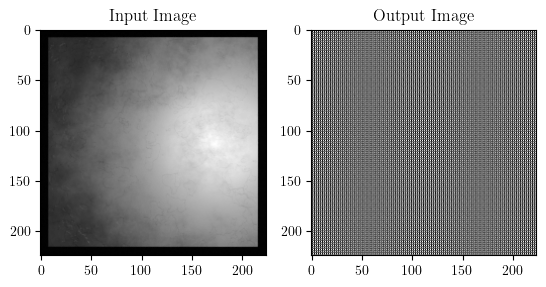

In [50]:
# One forward pass
img = train_loader.dataset[0] 
print("Input shape:", img.shape)
output = model(img.cuda())

print("Output shape:", output.shape)

# print(image[0].detach().numpy())
from matplotlib import pyplot as plt
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(img[0].detach().numpy(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Output Image')
plt.imshow(output[0].cpu().detach().numpy(), cmap='gray')
plt.show()

  1%|          | 1/100 [00:09<15:48,  9.58s/it]

Epoch [1/100], Loss: 0.0312, Validation Loss: 0.0309


  6%|▌         | 6/100 [00:26<05:43,  3.65s/it]

Epoch [6/100], Loss: 0.0232, Validation Loss: 0.0212


 11%|█         | 11/100 [00:42<05:04,  3.42s/it]

Epoch [11/100], Loss: 0.0058, Validation Loss: 0.0055


 16%|█▌        | 16/100 [01:01<05:05,  3.63s/it]

Epoch [16/100], Loss: 0.0013, Validation Loss: 0.0011


 21%|██        | 21/100 [01:18<04:37,  3.52s/it]

Epoch [21/100], Loss: 0.0004, Validation Loss: 0.0004


 26%|██▌       | 26/100 [01:38<04:46,  3.87s/it]

Epoch [26/100], Loss: 0.0003, Validation Loss: 0.0002


 31%|███       | 31/100 [01:56<04:15,  3.70s/it]

Epoch [31/100], Loss: 0.0002, Validation Loss: 0.0002


 36%|███▌      | 36/100 [02:14<03:52,  3.64s/it]

Epoch [36/100], Loss: 0.0003, Validation Loss: 0.0002


 41%|████      | 41/100 [02:32<03:30,  3.56s/it]

Epoch [41/100], Loss: 0.0002, Validation Loss: 0.0002


 46%|████▌     | 46/100 [02:50<03:13,  3.59s/it]

Epoch [46/100], Loss: 0.0002, Validation Loss: 0.0002


 51%|█████     | 51/100 [03:07<02:53,  3.53s/it]

Epoch [51/100], Loss: 0.0002, Validation Loss: 0.0002


 56%|█████▌    | 56/100 [03:25<02:37,  3.57s/it]

Epoch [56/100], Loss: 0.0001, Validation Loss: 0.0001


 61%|██████    | 61/100 [03:43<02:18,  3.55s/it]

Epoch [61/100], Loss: 0.0002, Validation Loss: 0.0002


 66%|██████▌   | 66/100 [04:01<01:59,  3.51s/it]

Epoch [66/100], Loss: 0.0001, Validation Loss: 0.0001


 71%|███████   | 71/100 [04:19<01:44,  3.60s/it]

Epoch [71/100], Loss: 0.0002, Validation Loss: 0.0002


 76%|███████▌  | 76/100 [04:36<01:25,  3.55s/it]

Epoch [76/100], Loss: 0.0002, Validation Loss: 0.0001


 81%|████████  | 81/100 [04:54<01:08,  3.62s/it]

Epoch [81/100], Loss: 0.0001, Validation Loss: 0.0001


 86%|████████▌ | 86/100 [05:12<00:49,  3.57s/it]

Epoch [86/100], Loss: 0.0003, Validation Loss: 0.0003


 91%|█████████ | 91/100 [05:30<00:32,  3.62s/it]

Epoch [91/100], Loss: 0.0001, Validation Loss: 0.0001


 96%|█████████▌| 96/100 [05:48<00:14,  3.50s/it]

Epoch [96/100], Loss: 0.0002, Validation Loss: 0.0002


100%|██████████| 100/100 [06:02<00:00,  3.62s/it]


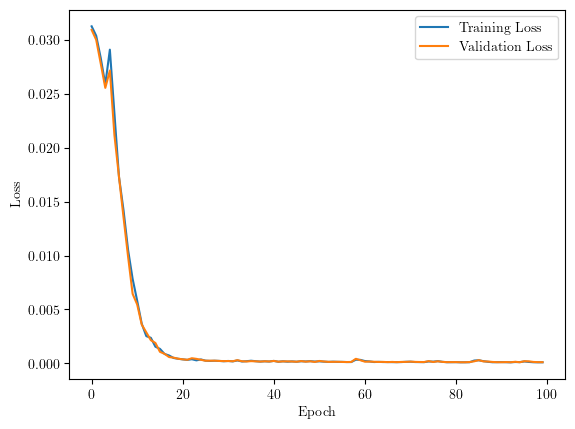

In [51]:
from tqdm import tqdm
import matplotlib.pyplot as plt
# Define a list to store training loss and validation loss

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Loss = []
Validation_Loss = []


num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    # for img, _ in train_loader:
    for idx, img in enumerate(train_loader):
        # print('img shape:', img.shape)
        img = img.cuda()
        
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad() #clears the gradients of all optimized tensors.  This step is necessary because gradients are accumulated by default in PyTorch, and we want to compute fresh gradients for the current batch of data.
        loss.backward() # This line computes the gradients of the loss function with respect to the model parameters. These gradients are used to update the model parameters during optimization.
        optimizer.step() # This line updates the model parameters using the computed gradients. 
    Loss.append(loss.item())
       

    # Calculate validation loss
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_loss_sum = 0.0
        num_batches = 0
        for idx, img in enumerate(vali_loader):
            img = img.cuda()
            output = model(img)
            val_loss = criterion(output, img)
            val_loss_sum += val_loss.item()
            num_batches += 1
        val_loss_avg = val_loss_sum / num_batches
        Validation_Loss.append(val_loss_avg)
    
    if epoch % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item(), val_loss_avg))

plt.plot(Loss, label='Training Loss')
plt.plot(Validation_Loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# Save the model
torch.save(model.state_dict(), 'saved_models/DeeperWiderAE.pth')

torch.Size([16, 1024, 14, 14])
torch.Size([16, 4, 224, 224])


<Figure size 1600x1200 with 0 Axes>

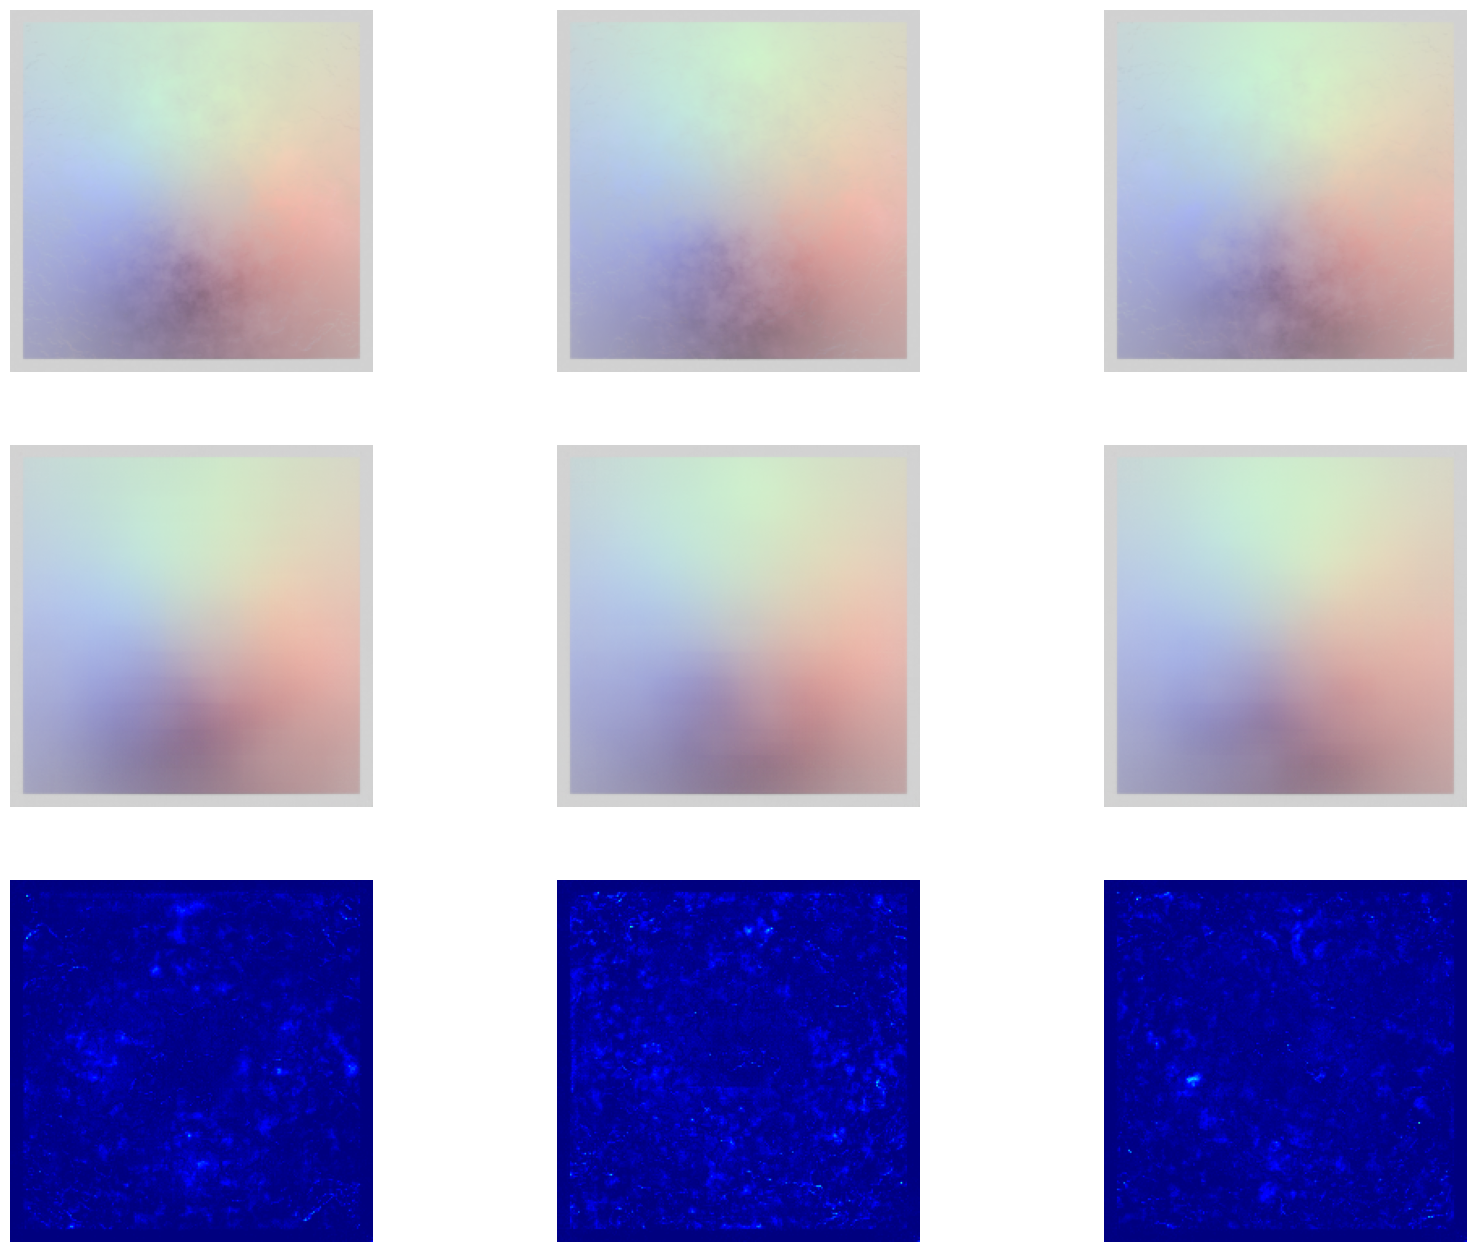

In [56]:
with torch.no_grad():
    for idx, data in enumerate(train_loader):
        data = data.cuda()
        recon = model(data)
        break

# latent_space = model.encoded
print(latent_space.shape)

recon_error =  ((data-recon)**2)#.mean(axis=1)
print(recon_error.shape)

plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5*4, 4*4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i].mean(axis=0).cpu().numpy(), cmap='jet',vmax= torch.max(recon_error[i])) #[0:-10,0:-10]
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()
    

data shape: (4, 224, 224)
recon shape: (4, 224, 224)


<Figure size 1600x1200 with 0 Axes>

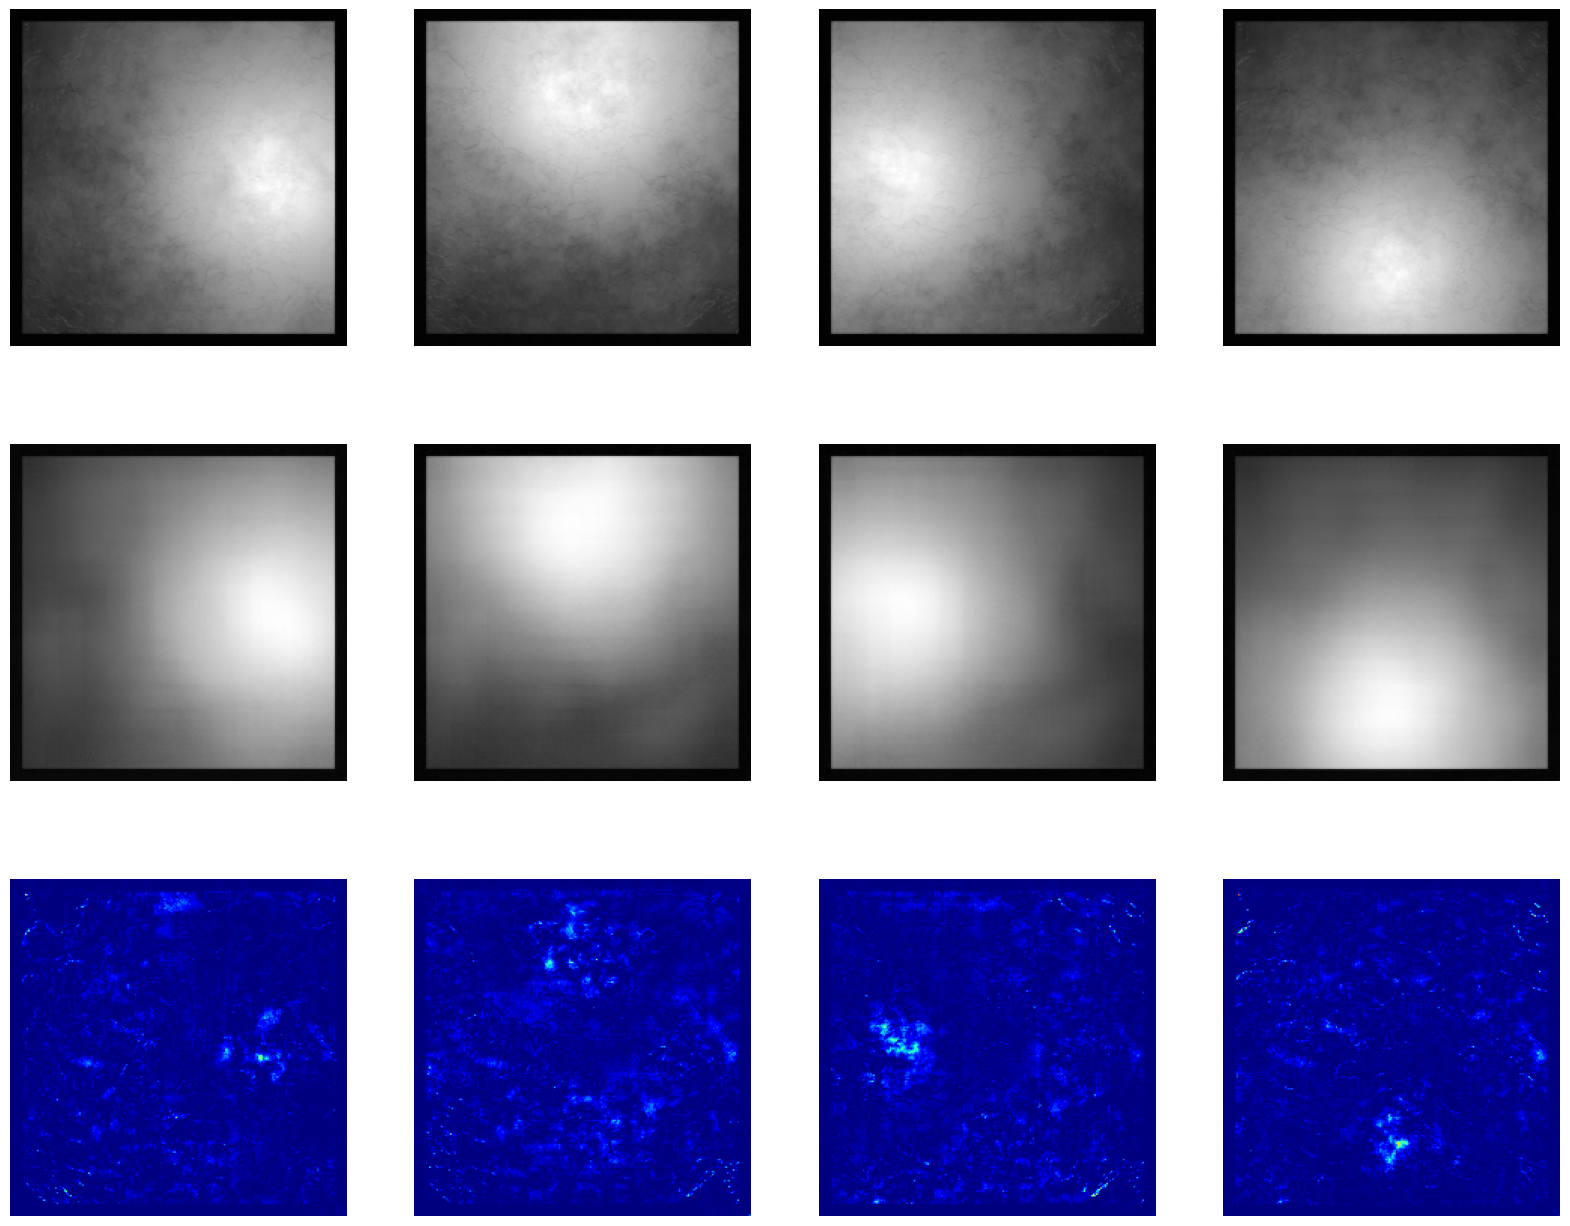

In [57]:
# from src.hypespectral_plotter import plot_hyperspectral_image
import numpy as np
def plot_hyperspectral_image(data, recon, recon_error, title="Hyperspectral Image"):
    
    print('data shape:',data.shape)
    tensor = torch.tensor(data[0])
    plt.figure(dpi=250)
    fig, ax = plt.subplots(3, data.shape[0], figsize=(5*4, 4*4))
    print('recon shape:',recon.shape)
    for i in range(data.shape[0]):
        ax[0, i].imshow(data[i], cmap='gray')
        ax[1, i].imshow(recon[i], cmap='gray')
        ax[2, i].imshow(recon_error[i], cmap='jet',vmax= torch.max(torch.tensor(recon_error))) #[0:-10,0:-10]
        ax[0, i].axis('OFF')
        ax[1, i].axis('OFF')
        ax[2, i].axis('OFF')
    
    ax[0, 0].set_ylabel('Input Image', fontsize=20)
    ax[1, 0].set_ylabel('Reconstructed Image', fontsize=20)
    ax[2, 0].set_ylabel('Reconstruction Error', fontsize=20)

    plt.show()

plot_hyperspectral_image(data[0].cpu().numpy(), recon[0].cpu().numpy(), recon_error[0].cpu().numpy(),
                        title='Hyperspectral Image Reconstruction Error')

C:\Users\Caspe\AppData\Local\Temp\ipykernel_6812\1847348400.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ax[2].imshow(recon_error[0].cpu()[0], cmap='jet',vmax= torch.max(torch.tensor(recon_error))) #[0:-10,0:-10]


<Figure size 640x480 with 0 Axes>

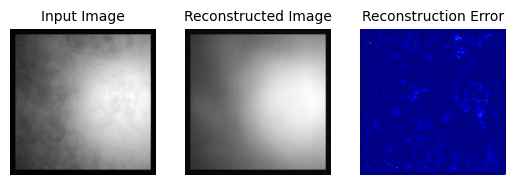

In [ ]:


plt.figure()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data[0].cpu()[0], cmap='gray')
ax[1].imshow(recon[0].cpu()[0], cmap='gray')
ax[2].imshow(recon_error[0].cpu()[0], cmap='jet',vmax= torch.max(torch.tensor(recon_error))) #[0:-10,0:-10]
ax[0].axis('OFF')
ax[1].axis('OFF')
ax[2].axis('OFF')
ax[0].set_title('Input Image', fontsize=10)
ax[1].set_title('Reconstructed Image', fontsize=10)
ax[2].set_title('Reconstruction Error', fontsize=10)


plt.show()

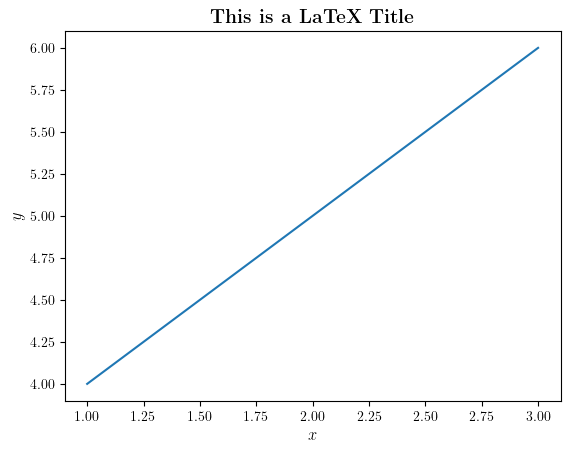

In [ ]:
## # Plotting with LaTeX-style titles
import matplotlib.pyplot as plt
import matplotlib as mpl

# Enable LaTeX rendering
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'  # LaTeX default font is Computer Modern (serif)

# Plot with LaTeX-style title
plt.plot([1, 2, 3], [4, 5, 6])
plt.title(r'\textbf{This is a LaTeX Title}', fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y$', fontsize=12)
plt.show()

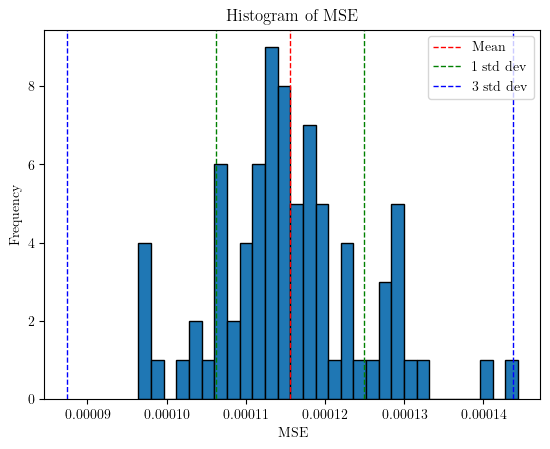

In [58]:
train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images, BS=1)
MSE = []
for inputs in train_loader:
    inputs = inputs.cuda()
    outputs = model(inputs)
    mse = criterion(outputs, inputs).item()
    MSE.append(mse)
mean = np.mean(MSE)
variance = np.var(MSE)

plt.hist(MSE, bins=30, edgecolor='black')
plt.axvline(x=np.mean(MSE), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=np.mean(MSE) + np.sqrt(variance), color='g', linestyle='dashed', linewidth=1, label='1 std dev')
plt.axvline(x=np.mean(MSE) - np.sqrt(variance), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE) + 3*np.sqrt(variance), color='b', linestyle='dashed', linewidth=1, label='3 std dev')
plt.axvline(x=np.mean(MSE) - 3*np.sqrt(variance), color='b', linestyle='dashed', linewidth=1)
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

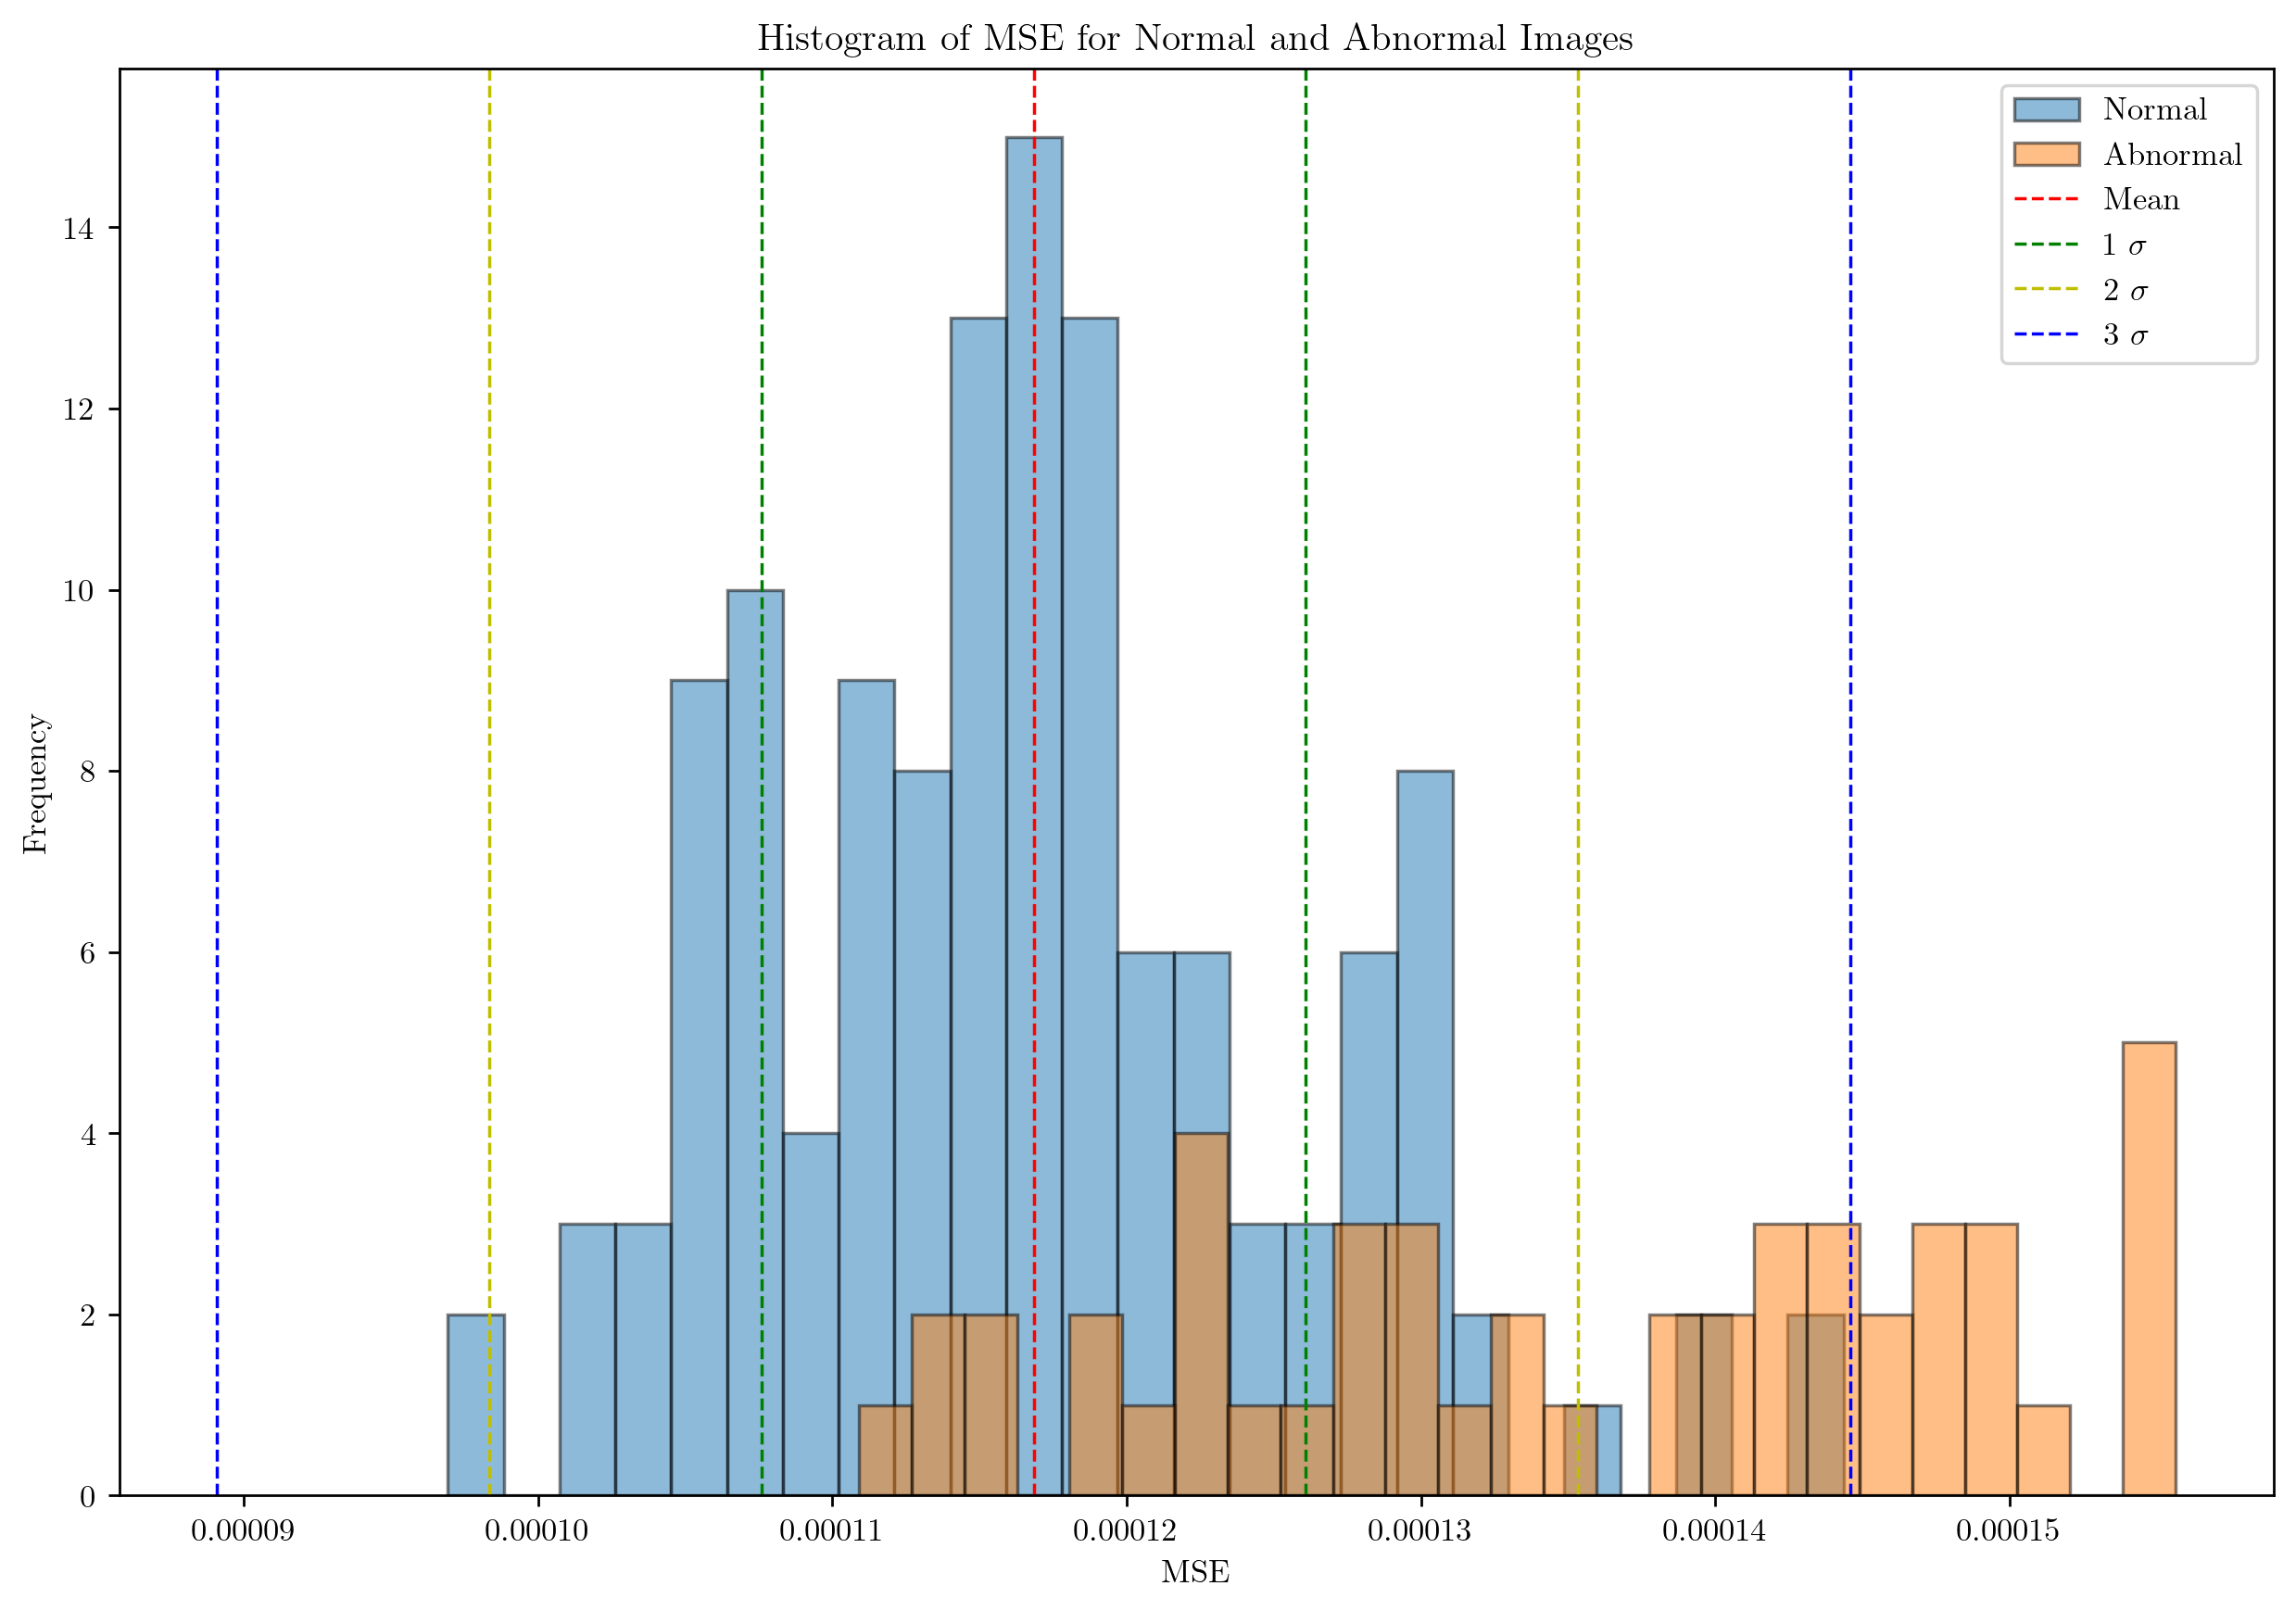

<Figure size 640x480 with 0 Axes>

In [59]:
train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images, BS=1)
MSE_normal = []
MSE_abnormal = []
for inputs, labels in test_loader:
    inputs = inputs.cuda()
    outputs = model(inputs)
    mse = criterion(outputs, inputs).item()
    if labels == 0:
        MSE_normal.append(mse)
    else:
        MSE_abnormal.append(mse)

for inputs in train_loader:
    inputs = inputs.cuda()
    outputs = model(inputs)
    mse = criterion(outputs, inputs).item()
    MSE_normal.append(mse)

variancePlot = np.var(MSE_normal)


plt.figure(dpi=250, figsize=(12, 8))
plt.hist(MSE_normal, bins=25, alpha=0.5, label='Normal', edgecolor='black')
plt.hist(MSE_abnormal, bins=25, alpha=0.5, label='Abnormal', edgecolor='black')
plt.axvline(x=np.mean(MSE_normal), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=np.mean(MSE_normal) + np.sqrt(variancePlot), color='g', linestyle='dashed', linewidth=1, label='1 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - np.sqrt(variancePlot), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE_normal) + 2*np.sqrt(variancePlot), color='y', linestyle='dashed', linewidth=1, label='2 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - 2*np.sqrt(variancePlot), color='y', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE_normal) + 3*np.sqrt(variancePlot), color='b', linestyle='dashed', linewidth=1, label='3 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - 3*np.sqrt(variancePlot), color='b', linestyle='dashed', linewidth=1)




plt.title('Histogram of MSE for Normal and Abnormal Images')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.savefig("figures/MSE histogram for simple auto encoder.pdf", format="pdf", bbox_inches="tight")